<a href="https://colab.research.google.com/github/al00pes/MVP_Analise_de_dados_PUC/blob/main/MVP_Sprint_Analise_de_dados_e_boas_praticas_PUC_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


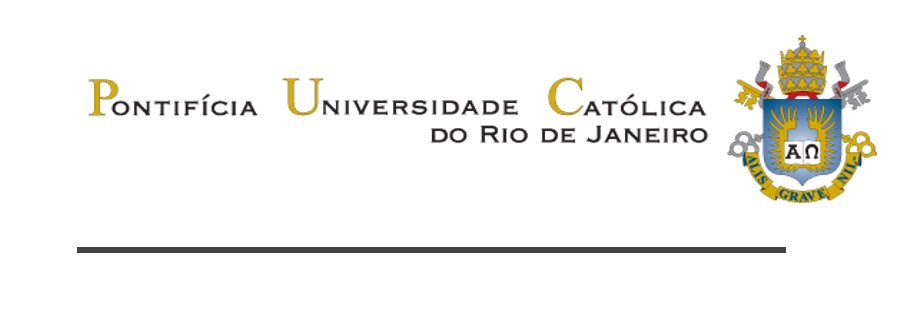

#MVP SPrint : Análise de Dados e Boas Práticas

#Aluno : Arthur F.F.Lopes

# 1. Definição do Problema

O dataset escolhido contém dados de uma empresa de logística,
onde possui informações que detalharei abaixo.

O Objetivo da analise é entender quais informações posso obter dos dados para apresentar a diretoria em um momento atual que a empresa passa por uma expansão de lojas e crescimento interno.

O dataset contém 18 colunas e 355861 linhas, as colunas são:

- Número de pedido -> Identificação do pacotes
- Franqueado -> Local que a galpão está vinculado
- Responsável pela entrega -> O motorista que realiza a entrega
- PDD de Entrega -> Local de saída dos pacotes
- Horário da entrega -> Data e hora da entrega do motorista para o cliente final
- Destino -> Cidade da Entrega
- Tipo de item -> Especificação do produto
- Tipo de Produto -> Apenas informado com duas letras
- Valor mercadoria -> O valor do produto que será entregue
- CEP destino -> O CEP do destinario ( Cliente)
- Endereço detalhado do destinatário -> Nome da rua e o numero da residencia
- Tempo de entrega -> O Tempo que demorou da retirado do galpão até a entrega final
- Tempo de aprovação - > Horário da aprovação
- Tempo de atualização -> Tempo da sincronização do pacotes com o sistema
- Modo de entrega -> Tipo de entrega que é realizada
- Tempo de criação - > Horário de criação do pacote no sistema

#2: Importação das bibliotecas necessárias


In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import missingno as ms # tratamento de missing
#Construição de gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl
#essa biblioteca não está mais ativa
#from brazilcep import get_address_from_cep, exceptions, WebService
import pandas as pd
import numpy as np
import time
import requests
import locale

#3. Carregamento dos dados

In [ ]:
pacotes_outubro = pd.read_csv('https://raw.githubusercontent.com/al00pes/MVP_Analise_de_dados_PUC/main/outubro01-15-2023.csv',delimiter=';')
#Exibir os dados carregador
pacotes_outubro.head()

,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,PDD de Entrega,Horário da entrega,Destino,Tipo de item,Tipo de Produto,Valor Mercadoria,CEP destino,Endereço detalhado do destinatário,Tempo de entrega,Tempo de aprovação,Tempo de atualização,Modo de entrega,Tempo de criação
0,888000259443753-000,NP RIO 02,CD RIO 004,CARLOS EDUARDO SOARES DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 18:48:53,Rio de Janeiro,Fragile Items,EZ,"476,9",23071570,"Rua Gutman BichoRua Gutman Bicho, 72, Fundos",2023-10-15 10:59:16,NaN,2023-10-15 18:52:03,Delivery3,2023-10-15 11:03:00
1,888000260356793-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:36:15,Rio de Janeiro,Roupa,EZ,"4,6",20740380,.Rua Torres de Oliveira 235,2023-10-15 10:56:04,NaN,2023-10-15 13:40:02,Delivery,2023-10-15 11:00:00
2,888000269117351-000,NP RIO 02,CD RIO 004,CAMILA AUGUSTO DE OLIVEIRA RODRIGUES,Recebimento com assinatura normal,CD RIO 004,2023-10-15 17:09:57,Rio de Janeiro,Fragile Items,EZ,"114,8",21810260,"Rua Simão CristinoRua Simão Cristino, 461, Casa 3",2023-10-15 10:56:28,NaN,2023-10-15 17:14:04,Delivery,2023-10-15 11:00:00
3,888000269896511-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:48:37,Rio de Janeiro,Roupa,EZ,"32,5",20740323,.Rua clarimundo de melo 446 bl1 apt 603,2023-10-15 11:00:16,NaN,2023-10-15 13:52:03,Delivery,2023-10-15 11:04:00
4,888000272767315-000,NP RIO 02,CD RIO 004,EVERTON NOLASCO DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 23:56:14,Rio de Janeiro,Roupa,EZ,"26,9",21853002,.Rua Pitanga do Gericinó 11,2023-10-15 10:53:26,NaN,2023-10-16 00:00:01,Delivery3,2023-10-15 10:57:00


# 4. Pré-processamento dos dados.

- Nessa etapa irei analisar o dataset e realizar operações de limpeza e preparação dos dados para obter alguns insights com os dados limpos de valores faltante.

In [ ]:
# Visualizando as informações do dataset
pacotes_outubro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355862 entries, 0 to 355861
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Número de pedido JMS                355862 non-null  object 
 1   Franqueado                          355862 non-null  object 
 2   Base de entrega                     355862 non-null  object 
 3   Responsável pela entrega            355862 non-null  object 
 4   Marca de assinatura                 355862 non-null  object 
 5   PDD de Entrega                      354930 non-null  object 
 6   Horário da entrega                  354930 non-null  object 
 7   Destino                             355812 non-null  object 
 8   Tipo de item                        355862 non-null  object 
 9   Tipo de Produto                     355862 non-null  object 
 10  Valor Mercadoria                    317717 non-null  object 
 11  CEP destino               

In [ ]:
pacotes_outubro.shape

(355862, 18)

Com a função (.info() ) -> É possível perceber que existem valores faltantes em algumas colunas, A maioria dos atributos são do tipo object ( string) e também existe uma coluna que não possui nem valor. Apartir de agora irei começar a faze o tratamento.

 a função (.shape ) nos dar uma visão da dimensão do dataframe

In [ ]:
#Verificando valores nulos ou faltantes
pacotes_outubro.isnull().sum()

Número de pedido JMS                       0
Franqueado                                 0
Base de entrega                            0
Responsável pela entrega                   0
Marca de assinatura                        0
PDD de Entrega                           932
Horário da entrega                       932
Destino                                   50
Tipo de item                               0
Tipo de Produto                            0
Valor Mercadoria                       38145
CEP destino                                0
Endereço detalhado do destinatário       337
Tempo de entrega                           0
Tempo de aprovação                    355862
Tempo de atualização                       0
Modo de entrega                            0
Tempo de criação                           0
dtype: int64

Como ja conheço os dados que contém dentro do dataset, posso entender que a falta de entrega de um determinado pacote, ocasiona a falta de alguns dados na coluna, como os dados do local da saída do pacote e o horário da entrega. Isso significa que são pacotes que não foram entregue. No primeiro momento será importante somente os pacotes entregues, por isso irei remover as linhas nulas desse atributo. Mas antes disso irei entender como estão esses missings dentro do atributo

In [ ]:
# Verificando com estão a distruição de valores nulos no atributo ' PDD de Entrega'
pacotes_outubro['PDD de Entrega'].unique()

array(['CD RIO 004', 'CD RIO 008', 'CD RIO 001', 'CD RIO 002',
       'CD RIO 005', nan, 'CD SGC 002', 'CD RIO 006', 'CD RIO 003',
       'CD RIO 007', 'CD RIO 009', 'CD SGC 001'], dtype=object)

As informação contida são as siglas dos galpões.
Até o momento temos 932 row dados nulos ( NaN ) na coluna " PDD de Entrega" , 932 row na coluna " Horário da entrega", 50 na coluna " Destino" e 38145 row no valor das colunas. Proximos passos:

- Nas colunas " PDD de Entrega" e " Horário da entrega" será necessário excluír os valores faltantes

In [ ]:
#Criando um novo dataset sem as row's com missings das colunas em destaque abaixo
pacotes_outubro_entregue = pacotes_outubro.dropna(subset=['PDD de Entrega', 'Horário da entrega'])

In [ ]:
pacotes_outubro_entregue.isnull().sum()

Número de pedido JMS                       0
Franqueado                                 0
Base de entrega                            0
Responsável pela entrega                   0
Marca de assinatura                        0
PDD de Entrega                             0
Horário da entrega                         0
Destino                                   50
Tipo de item                               0
Tipo de Produto                            0
Valor Mercadoria                       38059
CEP destino                                0
Endereço detalhado do destinatário       335
Tempo de entrega                           0
Tempo de aprovação                    354930
Tempo de atualização                       0
Modo de entrega                            0
Tempo de criação                           0
dtype: int64

In [ ]:
pacotes_outubro_entregue.drop(['Tipo de item', 'Tipo de Produto', 'Tempo de entrega','Tempo de aprovação','Tempo de atualização','Modo de entrega', 'Tempo de criação'], axis=1, inplace=True)

In [ ]:
pacotes_outubro_entregue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354930 entries, 0 to 355861
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Número de pedido JMS                354930 non-null  object
 1   Franqueado                          354930 non-null  object
 2   Base de entrega                     354930 non-null  object
 3   Responsável pela entrega            354930 non-null  object
 4   Marca de assinatura                 354930 non-null  object
 5   PDD de Entrega                      354930 non-null  object
 6   Horário da entrega                  354930 non-null  object
 7   Destino                             354880 non-null  object
 8   Valor Mercadoria                    316871 non-null  object
 9   CEP destino                         354930 non-null  int64 
 10  Endereço detalhado do destinatário  354595 non-null  object
dtypes: int64(1), object(10)
memory usage: 3

Nessa etapa realizei a exclusão dos missings dos atributos 'PDD de Entrega', 'Horário da entrega' e também foi necessário remover (.drop) alguns atributos que não serão necessário para a analise posteriormente como os atributos :

-  'Tipo de item', 'Tipo de Produto', 'Tempo de entrega','Tempo de aprovação','Tempo de atualização','Modo de entrega', 'Tempo de criação'.

Com isso ficamos com apenas 11 atributos.

In [ ]:
pacotes_outubro_entregue.isnull().sum()

Número de pedido JMS                      0
Franqueado                                0
Base de entrega                           0
Responsável pela entrega                  0
Marca de assinatura                       0
PDD de Entrega                            0
Horário da entrega                        0
Destino                                  50
Valor Mercadoria                      38059
CEP destino                               0
Endereço detalhado do destinatário      335
dtype: int64

Nessa etapa, irei tratar o atributo ' Valor mercadoria', Entender como estão os missings dentro do dataset e realizar um tratamento com preenchimento da media dos valores, pois a media é menos sensiveis a outliers.

In [ ]:
# Modificando a (virgula) por (ponto).
pacotes_outubro_entregue['Valor Mercadoria'] = pacotes_outubro_entregue['Valor Mercadoria'].str.replace(',','.')

# Convertendo o tipo da coluna " Valor Mercadoria" em float

pacotes_outubro_entregue['Valor Mercadoria'] = pacotes_outubro_entregue['Valor Mercadoria'].astype(float)


In [ ]:
# validando a transformação na coluna
pacotes_outubro_entregue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354930 entries, 0 to 355861
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Número de pedido JMS                354930 non-null  object 
 1   Franqueado                          354930 non-null  object 
 2   Base de entrega                     354930 non-null  object 
 3   Responsável pela entrega            354930 non-null  object 
 4   Marca de assinatura                 354930 non-null  object 
 5   PDD de Entrega                      354930 non-null  object 
 6   Horário da entrega                  354930 non-null  object 
 7   Destino                             354880 non-null  object 
 8   Valor Mercadoria                    316871 non-null  float64
 9   CEP destino                         354930 non-null  int64  
 10  Endereço detalhado do destinatário  354595 non-null  object 
dtypes: float64(1), int64(1), o

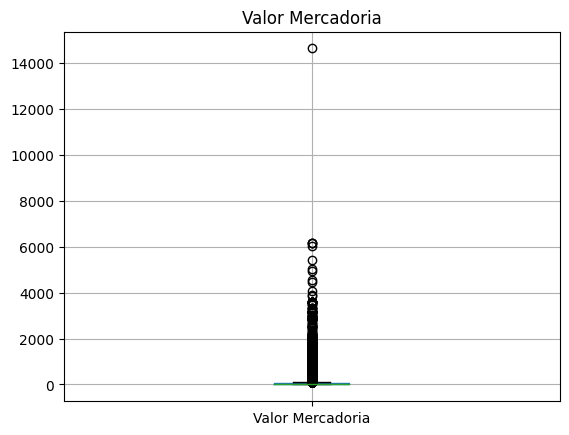

In [ ]:
pacotes_outubro_entregue.boxplot(column=['Valor Mercadoria'])
plt.title('Valor Mercadoria')
plt.show()

O grafico de bloxplot nos mostra a distribuição dos valores que possuem outliers, porém são "falsos outlier's" por os valores de cada produto são diferente. Por isso irei substituir os missings pela media dos valores, porque a media dos valores se comportam melhores em caso que possuem outliers.

In [ ]:
# Tratando os valores faltantes com as medias

media_valor_mercadoria = pacotes_outubro_entregue['Valor Mercadoria'].median()

# substituindo os valores faltantes pela media dos valores

pacotes_outubro_entregue['Valor Mercadoria'].fillna(media_valor_mercadoria, inplace=True)

#validando a alteração

pacotes_outubro_entregue.isnull().sum()

Número de pedido JMS                    0
Franqueado                              0
Base de entrega                         0
Responsável pela entrega                0
Marca de assinatura                     0
PDD de Entrega                          0
Horário da entrega                      0
Destino                                50
Valor Mercadoria                        0
CEP destino                             0
Endereço detalhado do destinatário    335
dtype: int64

Nessa etapa está faltando apenas tratar os valores dos atributos ' Destino ' e também 'Endereço detalhado do destinatário'. Para realziar esse tratamento, vou utilizar o atributo CEP para fazer a busca do endereço completo na API e retornar somente com a Cidade nesse primeiro tratamento, pois no posterior, irei buscar o nome da rua.

In [ ]:
#Função que consome a API para usar  o CEP e obter a informação que preciso

def buscar_destino_api(cep):

  url = f"https://viacep.com.br/ws/{cep}/json/"
  response = requests.get(url)
  data = response.json()
  return data['localidade']

# Se for necessário mais informações, basta descomentar
  '''if "erro" not in data:
        return {
            "cep": data["cep"],
            "logradouro": data["logradouro"],
            "bairro": data["bairro"],
            "cidade": data["localidade"],
            "estado": data["uf"]
        }
    else:
        return None'''

In [ ]:
#validando o uso da API e da função em conjunto
buscar_destino_api('25585152')

'São João de Meriti'

Agora irei identificar todos os missings da coluna 'Destino' e identificados com o index e instanciar tudo isso na variavel "nan_indices", que utilizarei mais a frente em um FOR.

In [ ]:
# identificando os valores NaN da coluna ' Destino'
nan_indices = pacotes_outubro_entregue[pacotes_outubro_entregue['Destino'].isna()].index

Abaixo irei fazer um loop que irá:
- Percorrer os valores filtrados (indices),
- Exibir o cep que está sendo pesquisado
- prencher a função "busca_destino_api()"
- Exibir a resposta da pesquisa
- Salvar no dataframe ,substituindo o missings da linha
- Irá "dormir" por 5 seg ( Essa foi a forma que conseguir de não ter meu ip bloqueado por imundação de solicitações)
- Em seguida pular para a proxima pesquisa.
Obs: Se a pesquisa encontrar algum erro, ele simplesmente ignora e vai para o proximo CEP.

In [ ]:
# Loop para percorrer os valores filtrados (indices) e preencher com o resultado da função acima

for index in nan_indices:
  try:
    cep_value = pacotes_outubro_entregue.loc[index,'CEP destino']
    print('CEP destino: ', cep_value)
    destino = buscar_destino_api(str(cep_value))
    print('Cidade: ', destino)
    pacotes_outubro_entregue.at[index, "Destino"] = destino
    time.sleep(5)

  except Exception:
    continue

CEP destino:  24931740
Cidade:  Maricá
CEP destino:  21061140
Cidade:  Rio de Janeiro
CEP destino:  23032450
Cidade:  Rio de Janeiro
CEP destino:  21046430
Cidade:  Rio de Janeiro
CEP destino:  24753000
Cidade:  São Gonçalo
CEP destino:  24753000
Cidade:  São Gonçalo
CEP destino:  21920316
Cidade:  Rio de Janeiro
CEP destino:  21921600
Cidade:  Rio de Janeiro
CEP destino:  23826425
Cidade:  Itaguaí
CEP destino:  24445590
Cidade:  São Gonçalo
CEP destino:  24711000
Cidade:  São Gonçalo
CEP destino:  24731060
Cidade:  São Gonçalo
CEP destino:  24932265
Cidade:  Maricá
CEP destino:  24932265
Cidade:  Maricá
CEP destino:  24932265
Cidade:  Maricá
CEP destino:  24932265
Cidade:  Maricá
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22773060
Cidad

In [ ]:
pacotes_outubro_entregue.isnull().sum()

Número de pedido JMS                    0
Franqueado                              0
Base de entrega                         0
Responsável pela entrega                0
Marca de assinatura                     0
PDD de Entrega                          0
Horário da entrega                      0
Destino                                 0
Valor Mercadoria                        0
CEP destino                             0
Endereço detalhado do destinatário    335
dtype: int64

Apos a execução da celula, todos os desino que estava faltando, foram preenchido com os destino correto.
O Proximo passo é fazer o mesmo procedimento, mas agora para a coluna "Endereço detalhado do destinatário" , onde contém 335 missings.

Para essa consulta, precisei :

- Instanciar as linhas com missings da "Endereço detalhado do destinatário"
- Percorrer o FOR e agora retornar apenas o Logadouro , que seria o nome da rua.

In [ ]:
# Identificandos os missings da coluna 'Endedreço detalhado do destinatário'
nan_indices = pacotes_outubro_entregue[pacotes_outubro_entregue['Endereço detalhado do destinatário'].isna()].index

In [ ]:
def buscar_endereco_api(cep):

  url = f"https://viacep.com.br/ws/{cep}/json/"
  response = requests.get(url)
  data = response.json()
  return data['logradouro']

# Se for necessário mais informações, basta descomentar
  '''if "erro" not in data:
        return {
            "cep": data["cep"],
            "logradouro": data["logradouro"],
            "bairro": data["bairro"],
            "cidade": data["localidade"],
            "estado": data["uf"]
        }
    else:
        return None'''

In [ ]:
buscar_endereco_api('25585150')

'Rua Ana Maria de Queiroz Matoso'

In [ ]:
for index in nan_indices:
  try:
    cep_value_endereco = pacotes_outubro_entregue.loc[index,'CEP destino']
    print('CEP destino: ', cep_value_endereco)
    endereco = buscar_endereco_api(str(cep_value_endereco))
    print('logradouro: ', endereco)
    pacotes_outubro_entregue.at[index,'Endereço detalhado do destinatário'] = endereco
    time.sleep(5)

  except Exception:
    continue

CEP destino:  22783375
logradouro:  Rua Mario Alberto Padilha
CEP destino:  24903810
logradouro:  Avenida Roberto Silveira
CEP destino:  21550510
logradouro:  Rua Teresa Santos
CEP destino:  24220380
logradouro:  Rua Geraldo Martins
CEP destino:  24360480
logradouro:  Rua Eurico Batista
CEP destino:  23092631
logradouro:  Rua Oreco
CEP destino:  20745250
logradouro:  Rua Paraná
CEP destino:  23515680
logradouro:  Rua Nestor
CEP destino:  22240003
logradouro:  Rua das Laranjeiras
CEP destino:  24931485
logradouro:  Rua São João
CEP destino:  21510102
logradouro:  Avenida dos Italianos
CEP destino:  22420020
logradouro:  Rua Farme de Amoedo
CEP destino:  20751390
logradouro:  Rua Paranapiacaba
CEP destino:  21911070
logradouro:  Rua Curuca
CEP destino:  22071055
logradouro:  Rua Professor Gastão Bahiana
CEP destino:  24474005
logradouro:  Estrada Trindade
CEP destino:  24421300
logradouro:  Rua José Lourenço Azevedo
CEP destino:  24914365
logradouro:  Rua Maria José dos Santos
CEP destin

In [ ]:
pacotes_outubro_entregue.isna().sum()

Número de pedido JMS                  0
Franqueado                            0
Base de entrega                       0
Responsável pela entrega              0
Marca de assinatura                   0
PDD de Entrega                        0
Horário da entrega                    0
Destino                               0
Valor Mercadoria                      0
CEP destino                           0
Endereço detalhado do destinatário    0
dtype: int64

<Axes: >

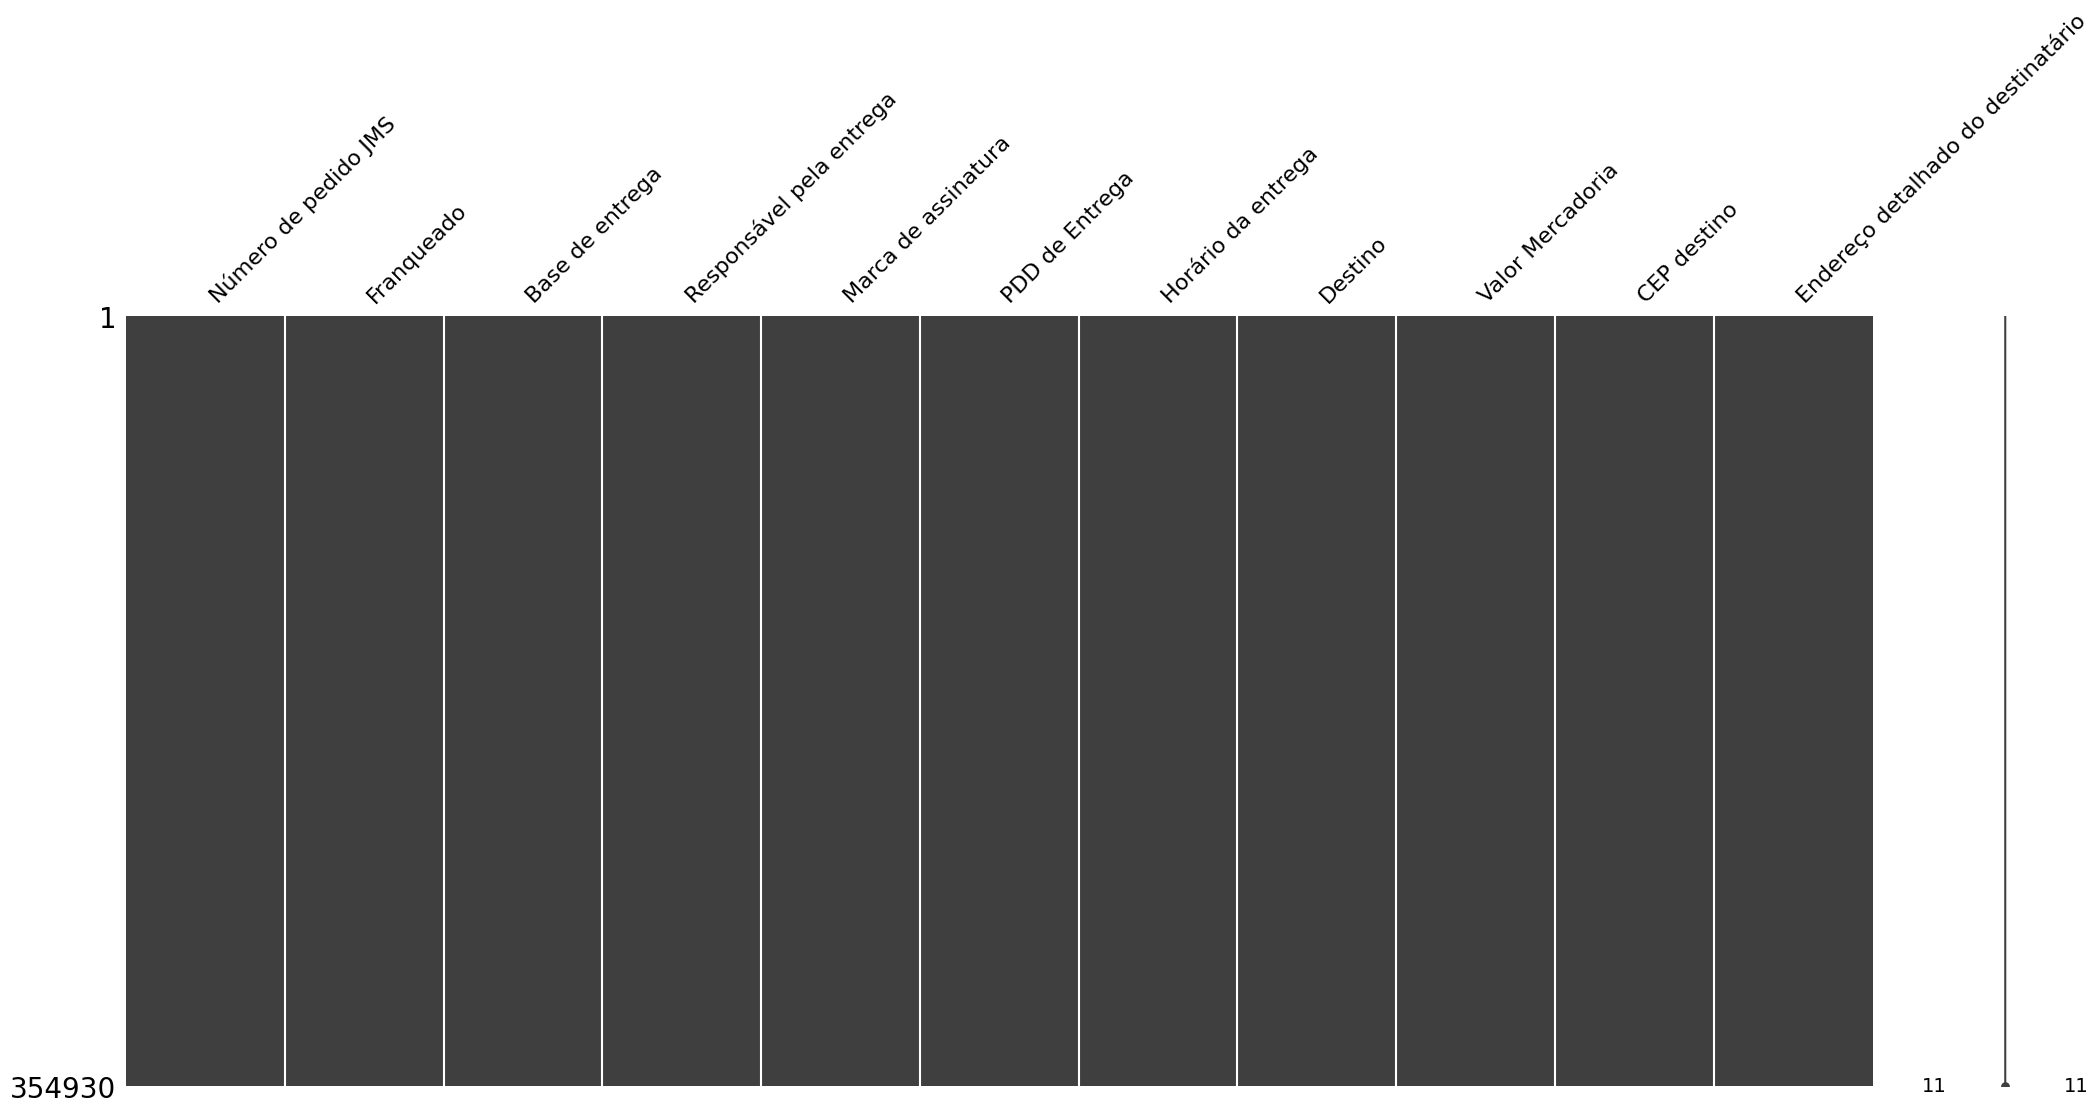

In [ ]:
ms.matrix(pacotes_outubro_entregue)

Nesse momento possuo um dataframe totalmente sem nenhum missings. Para ganhar tempo nas analises, irei salvar o dataframe em um csv para utilizalo na proxima etapa de analise exploratória.

In [ ]:
#Salvando o dataframe limpo em um csv
pacotes_outubro_entregue.to_csv('pacotes_entregues.csv')

#5. Analise Exploratória - Part.2

NA etapa da analise exploratória , precisei importando novamente um csv do github. Como no colab a sessão não permanece por muito e para obter alguns dados, eu consumo a API do viacep. Como a consulta na API demora bastante, optei por salvar os dados ja limpos e importar novamente.

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import missingno as ms # tratamento de missing
#Construição de gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl
#essa biblioteca não está mais ativa
#from brazilcep import get_address_from_cep, exceptions, WebService
import pandas as pd
import numpy as np
import time
import requests
import locale
from babel.dates import format_date, get_day_names

irei fazer a carga dos dados limpos diretamento do github e apos transformar em um dataframe.

In [ ]:
#Carga de dados

pacotes_outubro_entregue = pd.read_csv('https://raw.githubusercontent.com/al00pes/MVP_Analise_de_dados_PUC/main/pacotes_entregues.csv', delimiter=',')

In [ ]:
pacotes_outubro_entregue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354930 entries, 0 to 354929
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          354930 non-null  int64  
 1   Número de pedido JMS                354930 non-null  object 
 2   Franqueado                          354930 non-null  object 
 3   Base de entrega                     354930 non-null  object 
 4   Responsável pela entrega            354930 non-null  object 
 5   Marca de assinatura                 354930 non-null  object 
 6   PDD de Entrega                      354930 non-null  object 
 7   Horário da entrega                  354930 non-null  object 
 8   Destino                             354930 non-null  object 
 9   Valor Mercadoria                    354930 non-null  float64
 10  CEP destino                         354930 non-null  int64  
 11  Endereço detalhado do dest

In [ ]:
pacotes_outubro_entregue.shape

(354930, 12)

Com a função .info() é possível verificar que todas as linhas estão preenchidas e com nenhum missings aparentemente identificados.
Porém será necessário realizar algumas transformações nas colunas, dependendo do que iremos precisar.
A função ".shape" me retorna a dimensão do dataframe que contém 354930 linhas e 12 colunas.

In [ ]:
pacotes_outubro_entregue.head(5)

,Unnamed: 0,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,PDD de Entrega,Horário da entrega,Destino,Valor Mercadoria,CEP destino,Endereço detalhado do destinatário
0,0,888000259443753-000,NP RIO 02,CD RIO 004,CARLOS EDUARDO SOARES DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 18:48:53,Rio de Janeiro,476.9,23071570,"Rua Gutman BichoRua Gutman Bicho, 72, Fundos"
1,1,888000260356793-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:36:15,Rio de Janeiro,4.6,20740380,.Rua Torres de Oliveira 235
2,2,888000269117351-000,NP RIO 02,CD RIO 004,CAMILA AUGUSTO DE OLIVEIRA RODRIGUES,Recebimento com assinatura normal,CD RIO 004,2023-10-15 17:09:57,Rio de Janeiro,114.8,21810260,"Rua Simão CristinoRua Simão Cristino, 461, Casa 3"
3,3,888000269896511-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:48:37,Rio de Janeiro,32.5,20740323,.Rua clarimundo de melo 446 bl1 apt 603
4,4,888000272767315-000,NP RIO 02,CD RIO 004,EVERTON NOLASCO DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 23:56:14,Rio de Janeiro,26.9,21853002,.Rua Pitanga do Gericinó 11


Usando a função .head() para visualizar as primeiras 5 linhas do dataframe.


Para a analise exploratória ficar mais facil de visualizar, irei substituir as siglas pelos nome que elas possuem com os seguintes passos:

Verificar a distruição dos valores com a função .unique()

Criar uma dicionario com os nomes referente as siglas

Criar uma nova coluna com o nome "nome_base" e utilizar a função lambda para adicionar no dataframe

In [ ]:
pacotes_outubro_entregue['PDD de Entrega'].unique()

array(['CD RIO 004', 'CD RIO 008', 'CD RIO 001', 'CD RIO 002',
       'CD RIO 005', 'CD SGC 002', 'CD RIO 006', 'CD RIO 003',
       'CD RIO 007', 'CD RIO 009', 'CD SGC 001'], dtype=object)

In [ ]:
# Criando um dicionario vinculando o codigo a nome do local
nome_base = {
    "CD RIO 002": "RAMOS",
    "CD RIO 003": "BENFICA",
    "CD RIO 001": "CURICICA",
    "CD RIO 007": "VARGEM PEQUENA",
    "CD RIO 004": "CAMPO GRANDE I",
    "CD RIO 005": "CAMPINHO",
    "CD SGC 001": "COLUBANDE",
    "CD RIO 006": "CAMPO GRANDE II",
    "CD SGC 002": "NEVES",
    "CD RIO 008": "CASCADURA",
    "CD RIO 009": "SAO CRISTOVAO"
}


In [ ]:
#Validando a variavel
nome_base

{'CD RIO 002': 'RAMOS',
 'CD RIO 003': 'BENFICA',
 'CD RIO 001': 'CURICICA',
 'CD RIO 007': 'VARGEM PEQUENA',
 'CD RIO 004': 'CAMPO GRANDE I',
 'CD RIO 005': 'CAMPINHO',
 'CD SGC 001': 'COLUBANDE',
 'CD RIO 006': 'CAMPO GRANDE II',
 'CD SGC 002': 'NEVES',
 'CD RIO 008': 'CASCADURA',
 'CD RIO 009': 'SAO CRISTOVAO'}

In [ ]:
pacotes_outubro_entregue['Nome_base'] = pacotes_outubro_entregue.apply(lambda row: nome_base[row["Base de entrega"]], axis=1)

In [ ]:
pacotes_outubro_entregue.head()

,Unnamed: 0,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,PDD de Entrega,Horário da entrega,Destino,Valor Mercadoria,CEP destino,Endereço detalhado do destinatário,Nome_base
0,0,888000259443753-000,NP RIO 02,CD RIO 004,CARLOS EDUARDO SOARES DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 18:48:53,Rio de Janeiro,476.9,23071570,"Rua Gutman BichoRua Gutman Bicho, 72, Fundos",CAMPO GRANDE I
1,1,888000260356793-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:36:15,Rio de Janeiro,4.6,20740380,.Rua Torres de Oliveira 235,CASCADURA
2,2,888000269117351-000,NP RIO 02,CD RIO 004,CAMILA AUGUSTO DE OLIVEIRA RODRIGUES,Recebimento com assinatura normal,CD RIO 004,2023-10-15 17:09:57,Rio de Janeiro,114.8,21810260,"Rua Simão CristinoRua Simão Cristino, 461, Casa 3",CAMPO GRANDE I
3,3,888000269896511-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:48:37,Rio de Janeiro,32.5,20740323,.Rua clarimundo de melo 446 bl1 apt 603,CASCADURA
4,4,888000272767315-000,NP RIO 02,CD RIO 004,EVERTON NOLASCO DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 23:56:14,Rio de Janeiro,26.9,21853002,.Rua Pitanga do Gericinó 11,CAMPO GRANDE I


Nessa etapa irei instancia uma variavel que contém somente a contagem do pacotes entregues, separados por base.

In [ ]:
#Instanciando o atributo "nome_base" e fazendo a contagem dos valores
base_entrega = pacotes_outubro_entregue['Nome_base'].value_counts()

In [ ]:
#exibindo o dataframe
base_entrega

RAMOS              66411
BENFICA            58201
CURICICA           46942
VARGEM PEQUENA     39094
CAMPO GRANDE I     34569
CAMPINHO           32877
COLUBANDE          24425
CAMPO GRANDE II    22398
NEVES              18806
CASCADURA          11166
SAO CRISTOVAO         41
Name: Nome_base, dtype: int64

Com o nome das colunas substituídos, podemos obter a quantidade de pedidos entregues por base. Assim temos RAMOS com o primeio lugar com 66411 pacotes entregues, seguido de Benfica 58201 e logo após CURICICA com 46942 pacotes entregues.
Proxima etapa é plotar alguns graficos para termos uma visualização mais amplas.

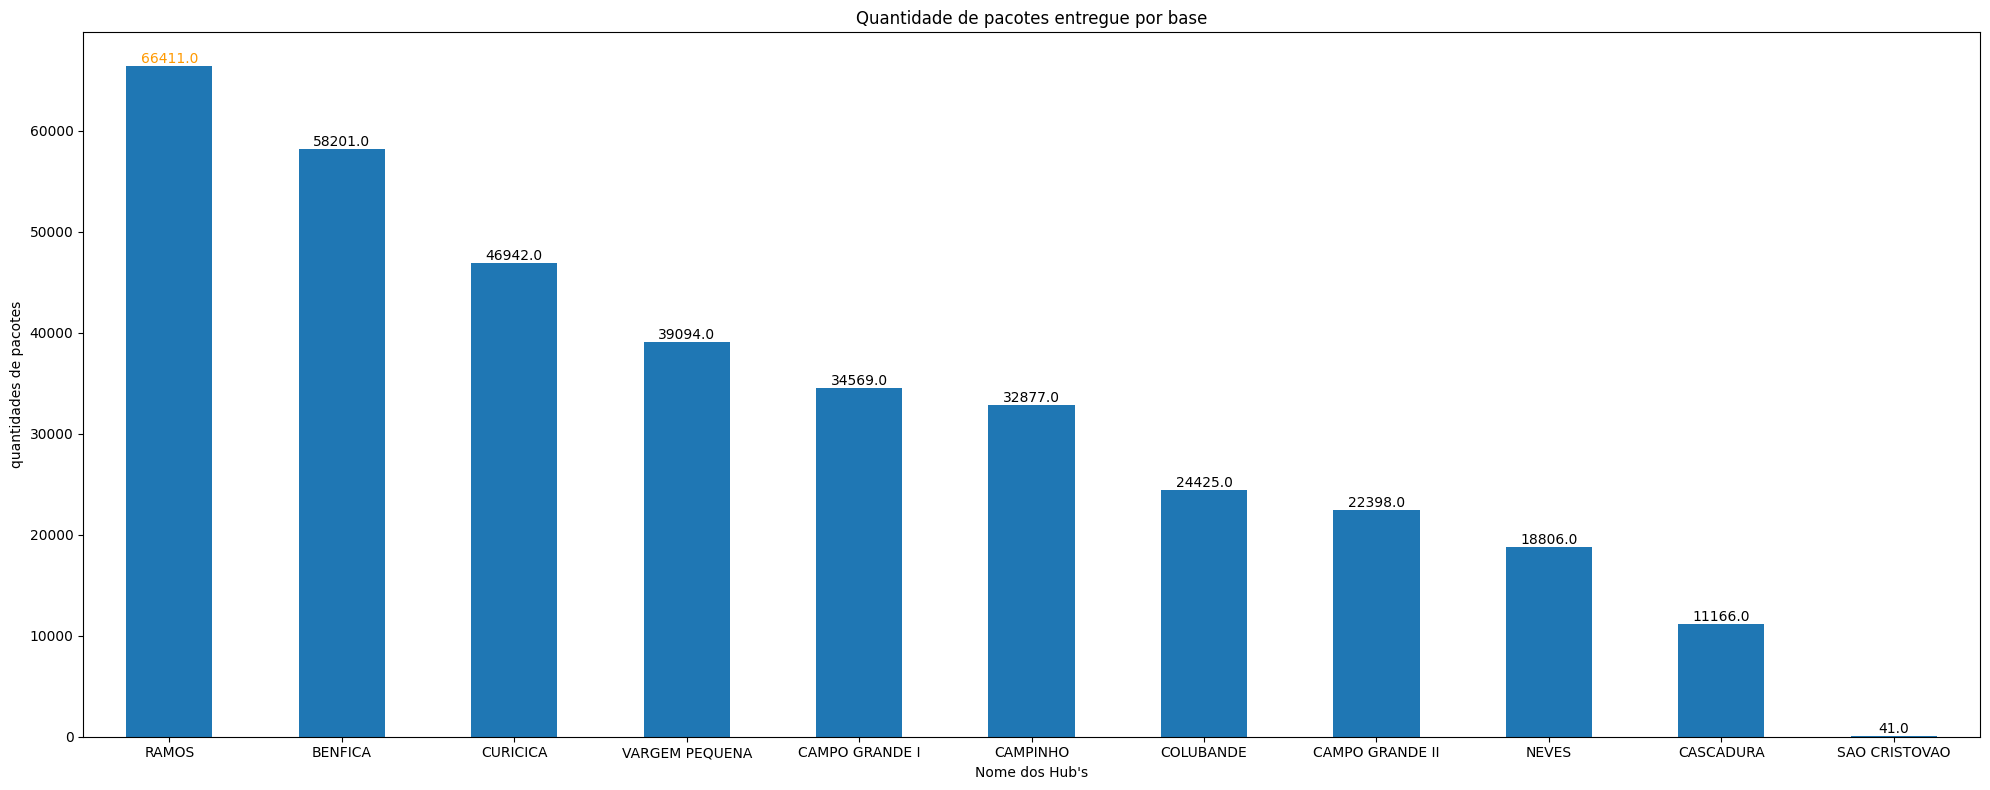

In [ ]:
# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(20,8))

# plota o gráfico de barras
base_entrega.plot(kind='bar', legend=False)
plt.title('Quantidade de pacotes entregue por base')
plt.xlabel("Nome dos Hub's")
plt.ylabel('quantidades de pacotes')

# Acrescenta os valores sobre as barras

b1 = ax.bar_label(ax.containers[0], fmt="%.1f")
b1[0].set_color("#ff9900")
# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

# Exibe o gráfico
plt.show()

Proximo passo é visualizar a distruição de pacotes entregue por cidade e poder observar quais cidades receberam mais entregas.
Para obter essa consulta, vou precisar criar um novo dataframe somente com os valores referente ao Destino e logo em seguida, plotar um graficos de barras verticais.

In [ ]:
# Instanciando a contagem de pacotes entregues por cidade

cidades_pacotes = pacotes_outubro_entregue['Destino'].value_counts().sort_values(ascending=True)

#exibindo o dataframe
cidades_pacotes

Barra do Piraí              1
Magé                        1
Cabo Frio                   1
São Pedro da Aldeia         1
Araruama                    1
Duque de Caxias             1
Nova Iguaçu                 2
Canarana                    5
Seropédica               1932
Maricá                   6207
Itaguaí                 10139
São Gonçalo             18268
Niterói                 18748
Rio de Janeiro         299623
Name: Destino, dtype: int64

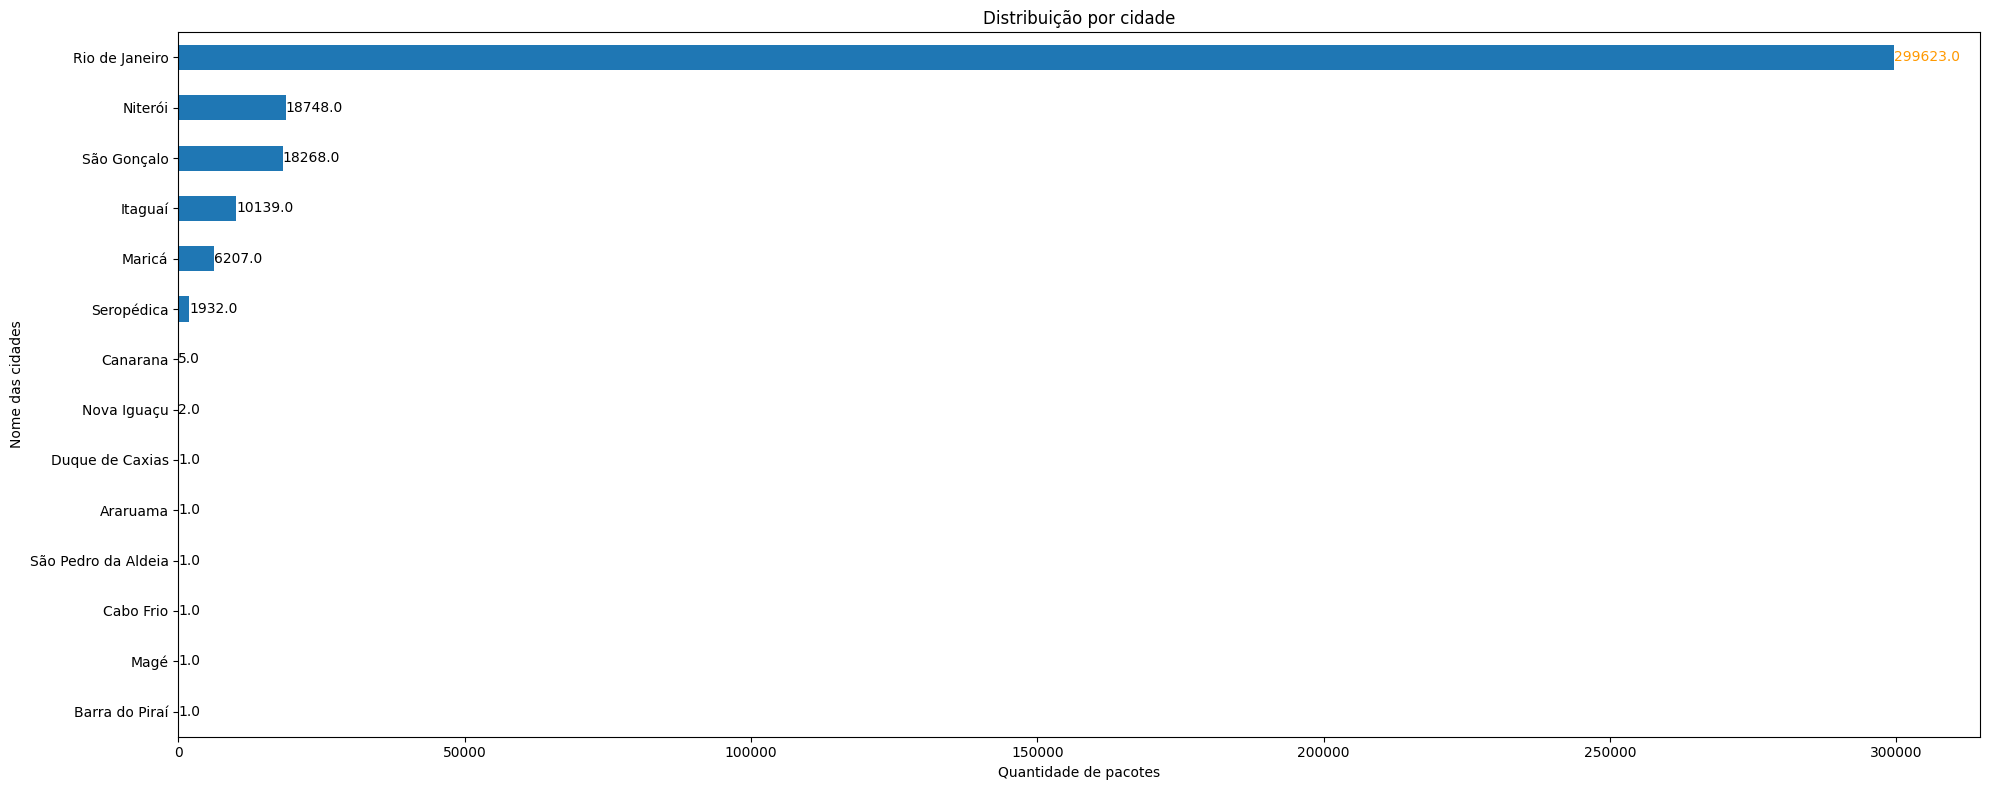

In [ ]:
# Plotando grafico de barras verticais com as cidades que mais tiveram pacotes entregues

#função pyplot.bar()
fig ,ax = plt.subplots(figsize = (20,8))

#Plotar o graficos
cidades_pacotes.plot(kind='barh' , legend= False)
plt.title("Distribuição por cidade")
plt.xlabel('Quantidade de pacotes')
plt.ylabel('Nome das cidades')

# Acrescenta os valores sobre as barras

b1 = ax.bar_label(ax.containers[0], fmt="%.1f")
b1[13].set_color("#ff9900")

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
#plt.savefig("barras-valor.pdf")
#plt.savefig("barras-valor.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("barras-valor.png", dpi = 150, format = "png")

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()
# Exibir o grafico
plt.show()

Com todas as informações disponiveis, é possível verificar que a cidade do Rio de Janeiro teve a maior volumetrica de entrega, mais de 10 vezes se comparado com as outras duas cidade abaixo ( Niteroi e São Gonçalo) que estão teve um desempenho praticamente iguais.
Agora que conseguindo ter uma visão das entregas por cidade e também por base, vamos verificar essa distruição feita pelo dia da semana.
Para realizar essa consulta, irei utiliza a função .groupby() para agrupar os atributos 'nome_base' e 'dia_da_semana' em apenas um dataframe e logo em seguida, plotar um grafico de linhas .

Antes de realizar tudo que foi descrito acima,  irei precisar fazer novamente alguns transformação para obter a consulta desejada. Essas transformações são:

- transformado o atributo ' Horário da Entrega' no tipo datatime
- Criando uma nova coluna com a data e hora formatada;
- Adicionando uma nova coluna especificando o dia da semana e definindo pelo idioma PT-BR;
- Criando um dataframe com tipo datetime e com os dia da semana definidos

In [ ]:
#transformado o atributo ' Horário da Entrega' no tipo datatime

pacotes_outubro_entregue['Horário da entrega'] = pd.to_datetime(pacotes_outubro_entregue['Horário da entrega'])

# Criando um nova nova coluna com a data e hora formatada

# Exibindo as primeiras 5 linhas

pacotes_outubro_entregue.head()



,Unnamed: 0,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,PDD de Entrega,Horário da entrega,Destino,Valor Mercadoria,CEP destino,Endereço detalhado do destinatário,Nome_base
0,0,888000259443753-000,NP RIO 02,CD RIO 004,CARLOS EDUARDO SOARES DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 18:48:53,Rio de Janeiro,476.9,23071570,"Rua Gutman BichoRua Gutman Bicho, 72, Fundos",CAMPO GRANDE I
1,1,888000260356793-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:36:15,Rio de Janeiro,4.6,20740380,.Rua Torres de Oliveira 235,CASCADURA
2,2,888000269117351-000,NP RIO 02,CD RIO 004,CAMILA AUGUSTO DE OLIVEIRA RODRIGUES,Recebimento com assinatura normal,CD RIO 004,2023-10-15 17:09:57,Rio de Janeiro,114.8,21810260,"Rua Simão CristinoRua Simão Cristino, 461, Casa 3",CAMPO GRANDE I
3,3,888000269896511-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:48:37,Rio de Janeiro,32.5,20740323,.Rua clarimundo de melo 446 bl1 apt 603,CASCADURA
4,4,888000272767315-000,NP RIO 02,CD RIO 004,EVERTON NOLASCO DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 23:56:14,Rio de Janeiro,26.9,21853002,.Rua Pitanga do Gericinó 11,CAMPO GRANDE I


In [ ]:
# Adicionando uma nova coluna com a data e hora formatada

#pacotes_outubro_entregue['dia_da_semana'] = pacotes_outubro_entregue['data_entrega'].dt.get_day_names(locale='pt_Br.utf8')

pacotes_outubro_entregue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354930 entries, 0 to 354929
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Unnamed: 0                          354930 non-null  int64         
 1   Número de pedido JMS                354930 non-null  object        
 2   Franqueado                          354930 non-null  object        
 3   Base de entrega                     354930 non-null  object        
 4   Responsável pela entrega            354930 non-null  object        
 5   Marca de assinatura                 354930 non-null  object        
 6   PDD de Entrega                      354930 non-null  object        
 7   Horário da entrega                  354930 non-null  datetime64[ns]
 8   Destino                             354930 non-null  object        
 9   Valor Mercadoria                    354930 non-null  float64       
 10  CEP dest

In [ ]:
#Criando uma nova coluna com a data e hora formatada
pacotes_outubro_entregue['data_entrega'] = pacotes_outubro_entregue['Horário da entrega'].dt.day_name()

# exibindo as primeiras 5 linhas
pacotes_outubro_entregue.head()

,Unnamed: 0,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,PDD de Entrega,Horário da entrega,Destino,Valor Mercadoria,CEP destino,Endereço detalhado do destinatário,Nome_base,data_entrega
0,0,888000259443753-000,NP RIO 02,CD RIO 004,CARLOS EDUARDO SOARES DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 18:48:53,Rio de Janeiro,476.9,23071570,"Rua Gutman BichoRua Gutman Bicho, 72, Fundos",CAMPO GRANDE I,Sunday
1,1,888000260356793-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:36:15,Rio de Janeiro,4.6,20740380,.Rua Torres de Oliveira 235,CASCADURA,Sunday
2,2,888000269117351-000,NP RIO 02,CD RIO 004,CAMILA AUGUSTO DE OLIVEIRA RODRIGUES,Recebimento com assinatura normal,CD RIO 004,2023-10-15 17:09:57,Rio de Janeiro,114.8,21810260,"Rua Simão CristinoRua Simão Cristino, 461, Casa 3",CAMPO GRANDE I,Sunday
3,3,888000269896511-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:48:37,Rio de Janeiro,32.5,20740323,.Rua clarimundo de melo 446 bl1 apt 603,CASCADURA,Sunday
4,4,888000272767315-000,NP RIO 02,CD RIO 004,EVERTON NOLASCO DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 23:56:14,Rio de Janeiro,26.9,21853002,.Rua Pitanga do Gericinó 11,CAMPO GRANDE I,Sunday


Nessa etapa estou classificando as datas das entregas pela dia da semana. Mas estou enfretando problemas, pois no jupyter notebook eu estava utizando essa sintaxa ' dataframe['dia_da_semana'] = dataframe['Horário da entrega'].dt.day_name(locale='pt_BR.utf8')' e conseguia ter o retorna dos dias da semana em portugues. Fui fazer a mesma sintaxe no colab e recebo um erro de ' unsupported locale setting ' , então decidir mudar a sintaxe, receber a resposta em inglês mesmo e realiza uma nova transformação, utilizando o lambda, como farei abaixo.

In [ ]:
dias_da_semana = {
    "Monday" : "Segunda-feira",
    "Tuesday" : "Terça-feira",
    "Wednesday": "Quarta-feia",
    "Thursday": "Quinta-feira",
    "Friday":"Sexta-feira",
    "Saturday": "Sabado",
    "Sunday": "Domingo"
}

In [ ]:
#função lambda para adicionar os valores no dataframe
pacotes_outubro_entregue['dia_da_semana'] = pacotes_outubro_entregue.apply(lambda row: dias_da_semana[row["data_entrega"]], axis=1)

#Validando a inserção dos valores
pacotes_outubro_entregue.head()

,Unnamed: 0,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,PDD de Entrega,Horário da entrega,Destino,Valor Mercadoria,CEP destino,Endereço detalhado do destinatário,Nome_base,data_entrega,dia_da_semana
0,0,888000259443753-000,NP RIO 02,CD RIO 004,CARLOS EDUARDO SOARES DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 18:48:53,Rio de Janeiro,476.9,23071570,"Rua Gutman BichoRua Gutman Bicho, 72, Fundos",CAMPO GRANDE I,Sunday,Domingo
1,1,888000260356793-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:36:15,Rio de Janeiro,4.6,20740380,.Rua Torres de Oliveira 235,CASCADURA,Sunday,Domingo
2,2,888000269117351-000,NP RIO 02,CD RIO 004,CAMILA AUGUSTO DE OLIVEIRA RODRIGUES,Recebimento com assinatura normal,CD RIO 004,2023-10-15 17:09:57,Rio de Janeiro,114.8,21810260,"Rua Simão CristinoRua Simão Cristino, 461, Casa 3",CAMPO GRANDE I,Sunday,Domingo
3,3,888000269896511-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:48:37,Rio de Janeiro,32.5,20740323,.Rua clarimundo de melo 446 bl1 apt 603,CASCADURA,Sunday,Domingo
4,4,888000272767315-000,NP RIO 02,CD RIO 004,EVERTON NOLASCO DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 23:56:14,Rio de Janeiro,26.9,21853002,.Rua Pitanga do Gericinó 11,CAMPO GRANDE I,Sunday,Domingo


In [ ]:
#excluir atributo que não é mais necessário

pacotes_outubro_entregue.drop('data_entrega', inplace=True, axis=1)

# validando a transformação

pacotes_outubro_entregue.head(1)

,Unnamed: 0,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,PDD de Entrega,Horário da entrega,Destino,Valor Mercadoria,CEP destino,Endereço detalhado do destinatário,Nome_base,dia_da_semana
0,0,888000259443753-000,NP RIO 02,CD RIO 004,CARLOS EDUARDO SOARES DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 18:48:53,Rio de Janeiro,476.9,23071570,"Rua Gutman BichoRua Gutman Bicho, 72, Fundos",CAMPO GRANDE I,Domingo


Agora com a coluna 'Horario da entrega' com o tipo datatime e os dias da semana em português, irei fazer o agrupamento do nome da base com o dia da semana. Dessa forma consigo obter a distribuição de pacotes pelos dias da semana.

In [ ]:
# Contando os valores de entrega por dia da semana
hubs_semana = pacotes_outubro_entregue['dia_da_semana'].value_counts()

#Exibindo todos os dias da semana
hubs_semana.head(7)

Segunda-feira    73252
Sexta-feira      63377
Sabado           55793
Quarta-feia      54643
Terça-feira      47706
Quinta-feira     40664
Domingo          19495
Name: dia_da_semana, dtype: int64

Podemos observar que segunda e sexta-feira foram os dias que obteve o maior numero de entregas. Irei plotar um grafico de pizza a verificar a porcentagem de data dia da semana.

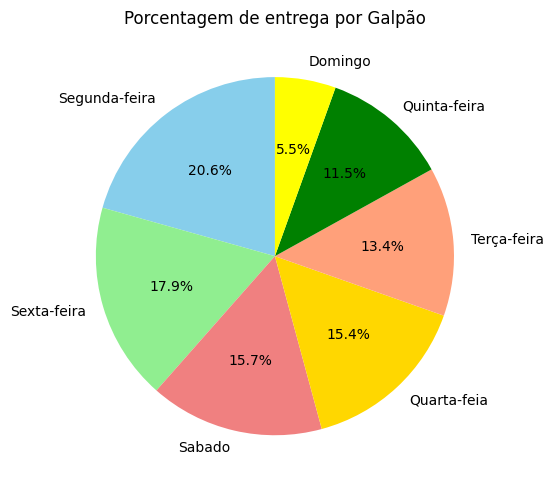

In [ ]:
plt.figure(figsize=(6,5))
hubs_semana.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightsalmon','green','yellow'])
plt.title('Porcentagem de entrega por Galpão')
plt.xlabel('')
plt.ylabel('')  # Adicionar legenda
# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()
#exibir o grafico
plt.show()

Com o gráfico de pizza, conseguimos observar que mais de 20% da entrega total dos pacotes da semana foram realizados na segunda-feira.
O proximo passo é olharmos as entregas feita pelos motorista e obter as seguintes informações:

- Quantidade de pacotes entregue por cada motorista
- listar os 5 motoristas que mais entregaram
- A media dos valores entregue por cada um
- Quantos dias de trabalho cada motorista realizou

In [ ]:
#Agrupando pedidos por motorista
pacotes_agregados = pacotes_outubro_entregue['Responsável pela entrega'].value_counts()
pacotes_agregados.head(20)

EVERTON NOLASCO DA SILVA               9983
NATAN RANGEL COSTA                     7297
CARLOS ALBERTO DE SOUZA JUNIOR         4942
BRUNO ANDERSON PIMENTEL PEREIRA        4624
GUSTAVO GUERRA LOPES BISCAIA           4503
WILIAM CALISTO SANTIAGO                4492
CARLOS IUSTEMBERG DA SILVA FERREIRA    4122
MARCO ANTONIO SEYTE DA FONSECA         3261
RAFAEL DE  ALBUQUERQUE TELLES          2806
MARCOS LACERDA DA SILVA                2782
LUCIANO DE SOUZA MERENDA               2455
ARTHUR BARROS DA SILVA DE MEDEIROS     2276
HERICK SANTOS DA PAIXAO                2189
BIANCA GONCALVES FERNANDES DE SOUZA    2182
JONAS SILVA DOS ANJOS                  2180
FERNANDO SANTANA BRANDAO               2090
ALINE CUNHA MACHADO                    2054
CRISTIANO SANTOS DE ANDRADA            2028
ALEXANDER ARAUJO DA SILVA              2027
LUIZ FELIPE FERREIRA DA SILVA          1999
Name: Responsável pela entrega, dtype: int64

O motorista EVERTON NOLASCO DA SILVA foi o agregado que obteve o maior numero de entregas nesse período. A quantidade expressiva de pacotes entregue mostra a agilidade e o bom desempenho. Em comparação o 5º colocado no ranking de entregas, o motorista mencionado, teve mais do que o dobro de entregas.
Com isso, vamos verifica quantos dias cara motorista trabalhou para obter essa quantidade de entregas.

Para obter a quantidade de dias trabalhados, vou precisar ter:
- Somente a data dos dias das entregas, sem a hora
- verifica a quantidade de dias que estou trabalhando
- agrupar por "REsponsavel pela entrega" e fazer a contagem utilizando a função.nunique(), que retorna a quantidade de valores iguais

In [ ]:
# Obtendo somente os dias, sem a hora da entrega

pacotes_outubro_entregue['Horário da entrega'] = pacotes_outubro_entregue['Horário da entrega'].dt.date


A sintaxe acima foi utilizada apenas mostrar a data de entrega, retirando o horário que estava junto com a data. Para isso utilizei a função ".dt.date"

In [ ]:
#Exibindo a primeira linhas
pacotes_outubro_entregue.head(1)

,Unnamed: 0,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,PDD de Entrega,Horário da entrega,Destino,Valor Mercadoria,CEP destino,Endereço detalhado do destinatário,Nome_base,dia_da_semana
0,0,888000259443753-000,NP RIO 02,CD RIO 004,CARLOS EDUARDO SOARES DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15,Rio de Janeiro,476.9,23071570,"Rua Gutman BichoRua Gutman Bicho, 72, Fundos",CAMPO GRANDE I,Domingo


In [ ]:
#Transformando para tipo datetime

pacotes_outubro_entregue['Horário da entrega'] = pd.to_datetime(pacotes_outubro_entregue['Horário da entrega'])

In [ ]:
#Contagem do dias de entrega
pacotes_outubro_entregue['Horário da entrega'].nunique()

29

In [ ]:
pacotes_outubro_entregue['Horário da entrega'].unique()

array(['2023-10-15T00:00:00.000000000', '2023-10-17T00:00:00.000000000',
       '2023-10-16T00:00:00.000000000', '2023-10-18T00:00:00.000000000',
       '2023-10-22T00:00:00.000000000', '2023-10-28T00:00:00.000000000',
       '2023-10-24T00:00:00.000000000', '2023-10-20T00:00:00.000000000',
       '2023-10-19T00:00:00.000000000', '2023-10-26T00:00:00.000000000',
       '2023-10-23T00:00:00.000000000', '2023-10-27T00:00:00.000000000',
       '2023-10-14T00:00:00.000000000', '2023-10-25T00:00:00.000000000',
       '2023-10-21T00:00:00.000000000', '2023-10-13T00:00:00.000000000',
       '2023-10-12T00:00:00.000000000', '2023-10-11T00:00:00.000000000',
       '2023-10-10T00:00:00.000000000', '2023-10-09T00:00:00.000000000',
       '2023-10-07T00:00:00.000000000', '2023-10-08T00:00:00.000000000',
       '2023-10-06T00:00:00.000000000', '2023-10-29T00:00:00.000000000',
       '2023-10-05T00:00:00.000000000', '2023-10-04T00:00:00.000000000',
       '2023-10-03T00:00:00.000000000', '2023-10-02

A função .nunique() foi utilizada para realizar a contagem dos dias que existem dentro do dataset e logo abaixo, utilizei a função .unique() para realmente validar a quantidade de dias que o dataset possuem. Como são apenas 29 dias, fica mais facil realizar essa validação.
Proximo passo será agrupar os motoristas ao dias da semana e fazer a contagem.

In [ ]:
# instanciando o agrupamento

dias_trabalhados = pacotes_outubro_entregue.groupby('Responsável pela entrega')['Horário da entrega'].nunique()

# Exibir a consulta ordenado por forma decrescente

dias_trabalhados.sort_values(ascending=False)

Responsável pela entrega
EVERTON NOLASCO DA SILVA            20
FERNANDO SANTANA BRANDAO            20
EDUARDO LUIZ RODRIGUES GUERRA       18
ANDRE VINICIUS NASCIMENTO           18
JANAINA RODRIGUES DE ARAUJO         18
                                    ..
RENATO BRITO DA SILVA                1
ROSANGELA FARIAS DA SILVA            1
FELIPE GUSTAVO DE SOUZA CUNHA        1
(BIKE)MARCOS DOS SANTOS SANTANA      1
YURI DOS REIS CARDOSO DA FONSECA     1
Name: Horário da entrega, Length: 465, dtype: int64

Como visto na consulta acima, o entregador EVERTON NOLASCO DA SILVA que teve a maior quantidade de pacotes entregue, consequentemente também foi um dos que teve a maior quantidade de dias trabalhados. Num total de de 29 dias, o mesmo trabalhou 20 dias.
A proxima analise é entender qual é a media de valor entregue por motorista.
Os valores podem ser diferente por conta de quantidade de pacotes entregue ou pelos valores descrepantes de cada produtos.

In [ ]:
pacotes_outubro_entregue['Valor Mercadoria'].sort_values(ascending=False)

328115    14638.45
354230     6182.68
354228     6182.68
354229     6182.68
92907      6048.66
            ...   
255531        0.00
189578        0.00
160051        0.00
237336        0.00
12316         0.00
Name: Valor Mercadoria, Length: 354930, dtype: float64

Utilizei a função ".sort_values(ascending=False)" para ordenar os valores de foma decrescente, desse forma consigo visualizar quais é o maior e o menor valore que contém. Mas com isso, percebi que existem missings nessa coluna ( os valores R$ 0.00) então irei preenche esses valores zero com a media do atributo. Assim teremos uma precisão melhor na visualização das informações.

In [ ]:
valores_zeros = (pacotes_outubro_entregue['Valor Mercadoria'] == 0.00).sum()

In [ ]:
valores_zeros

45

Existem 45 valores zerados, então irei calcular a media da coluna e em seguida subtituir pela media.

In [ ]:
#Calculando a media com os valores diferente de 0
media_do_valor_mercadoria = pacotes_outubro_entregue['Valor Mercadoria'][pacotes_outubro_entregue['Valor Mercadoria']!=0].mean()

In [ ]:
media_do_valor_mercadoria

39.0880861687589

In [ ]:
#substuindo os valores 0.00 pela media

pacotes_outubro_entregue['Valor Mercadoria'] = pacotes_outubro_entregue['Valor Mercadoria'].replace(0.00, media_do_valor_mercadoria)

In [ ]:
pacotes_outubro_entregue['Valor Mercadoria'].sort_values(ascending=False)

328115    14638.45
354228     6182.68
354229     6182.68
354230     6182.68
92907      6048.66
            ...   
113267        0.01
282759        0.01
352750        0.01
341291        0.01
218540        0.01
Name: Valor Mercadoria, Length: 354930, dtype: float64

Agora os valores zerados foram preenchido com a media dos valores dos pacotes.
Proximo passo é verificar a media de valores dos pacotes entregue por motoristas.

In [ ]:
# media de valores entregue por motorista
media_valores_motorista = pacotes_outubro_entregue.groupby('Responsável pela entrega')['Valor Mercadoria'].mean().round()

#Exibir os valores de forma decrescente
media_valores_motorista.sort_values(ascending=False)

Responsável pela entrega
MARCOS ALEXANDRE PEREIRA DA SILVA    680.0
LAURO BONATES NETO                   457.0
ALEXANDER GOMES DE JESUS             143.0
RUDNEI COSTA DOS SANTOS               97.0
DANIEL DA SILVA                       92.0
                                     ...  
(BIKE)GABRIEL CARDOSO LEONEL          14.0
OTAVIO LACERDA DE OLIVEIRA            14.0
(BIKE)FABIO DOS SANTOS BATISTA        12.0
PAULO GIOVANI LEONCIO DA SILVA         5.0
VINICIUS DE OLIVEIRA FARIA             0.0
Name: Valor Mercadoria, Length: 465, dtype: float64

In [ ]:
#Quantidade de pacotes entregue
pacotes_agregados.loc['MARCOS ALEXANDRE PEREIRA DA SILVA']

1

Acima está a consulta do valor médio agrupado por 'Responsável da entrega" . Por existirem valores bastantes variados, é comum termos resultados tão descrepantes. Por exemplo, o motorista MARCOS ALEXANDRE PEREIRA DA SILVA realizou apenas uma entrega ( consulta realizada acima usando .loc[''])

Com isso, chega ao fim a minha analise.
Fazendo um resumo da analise, foi possivel sabermos:

Com isso, chega ao fim a minha analise.
Fazendo um resumo da analise, foi possivel sabermos:
- A quantidade de pacotes entregue por base
- Quantidade de dias trabalhados de cada motorista
- Quais foram o dia da semana que mais houve entrega.
- A quantidade pacotes entregue por cidade
- A porcetagem de pacotes entrege por semana
- Valor medio que cada motorista teve nas entregas.